# ASSIGNMENT - CYBERBOXER

Q1. How can we transform a text to numerical representation? (Write any three of them with one-line description)

SOLUTION:-

•	BAG OF WORDS: BOW works using text vectorization, it takes the count of occurences of a particular token of the text and each token will have a feature column. eg; a good movie( 1110), not a good movie(1111).

•	Integer Encoding & One hot Encoding: applicable for data with ordinal and non ordinal relationship, that represents categorical text data into binary vectors.

•	Skip-gram: this model takes each and every word in a large focus word and one-by-one the words that surrounds it within a defined window is then then feed to a neural network that after training predicts the probability for each word to actually appear in the window around the focus word.

Q2. List three(min) things to evaluate a classification model.

SOLUTION:-

•	Accuracy represents the proportion of correctly classified observations for a classification model.

•	Confusion matrix a 2x2 table showing four parameters: the number of true positives (TP), true negatives (TN), false negatives (FN) and false positives (FP).

•	Precision, Recall and Specificity, the major performance metrics that describes a predictive classification model.

•	ROC curve and Area Under the Curve (AUC) to summarize the overall performance of the classifier.

•	For the evaluation of overall efficacy of a classification test: Balanced Accuracy and Diagnostic Odd Ratio (DOR). DOR is a term taken from medical domain. It checks the overall efficacy of a classification test. 



3. Develop a code for the following problem:

a. Create a crawler for any news portal which can extract news events/information.
b. Save all the extracted information into a csv/excel file with file name:news_portal_(date or page no).
c. Parameters to extract are as follows, Article Content, Date Posted, Tags, Author etc.

SOLUTION: I have considered news portal : sciencenews.org for making the crawler. I am extracting News Title, Link of the news, Author Name, Date of posting and Comtent of the articles. I have extracted the information in "sciencenews_all_data.csv" file.


In [1]:
#..................using libraby BeautifulSoup....................for news crawler.............................#
from bs4 import BeautifulSoup
import requests, csv

source = requests.get('https://www.sciencenews.org/').text
 # data extracted from science news .com
soup = BeautifulSoup(source)

#...........................for extracting data into csv............................................................#
csv_file = open('sciencenews_all_data.csv', 'w',encoding="utf-8")
csv_writer = csv.writer(csv_file)

csv_writer.writerow(['Topic Name', 'Link', 'Author name', 'Date of Posting', 'Summary'])

# .................................................For DATA CRAWLER ................................................#
for item in soup.findAll('h2', {'class' :'node-title' }):
            for link in item('a'): 
                #title = "TITLE: " + item.string + "."
                title = item.string
                #print("LINK:-")
                href ="https://www.sciencenews.org/" + link.get('href')
                print(title)
                print(href)
                source = requests.get(href)
                text = source.text
                soup = BeautifulSoup(text)
                for link in soup.findAll('span' , {'itemprop' : 'name' }):
                    author = link.string
                    for lin in soup.findAll('div', {'class' : 'view view-article-related-content view-id-article_related_content view-display-id-attachment_1'}):
                        for t in lin('span' , {'class' : 'field-content'}):
                            #time = "DATE & TIME OF POSTING:" + t.string
                            time = t.string
                    print(author)
                    print(time + "\n")
                for link in soup.findAll('span', {'itemprop':'description'}):
                    for i in link('p'):
                        #a = "ABOUT :- \n" + i.text 
                        a = i.text
                        #print(a)
            csv_writer.writerow([title, href, author, time, a])
csv_file.close()
print('Scraping Done!')

Exploding stars scattered traces of iron over Antarctic snow
https://www.sciencenews.org//article/exploding-stars-scattered-traces-iron-over-antarctic-snow
Emily Conover
6:00am, August 9, 2019

How these tiny insect larvae leap without legs
https://www.sciencenews.org//article/how-these-tiny-insect-larvae-leap-without-legs
Susan Milius
6:20pm, August 8, 2019

The worst wildfires can send smoke high enough to affect the ozone layer
https://www.sciencenews.org//article/worst-wildfires-can-send-smoke-high-enough-affect-ozone-layer
Megan Sever
2:00pm, August 8, 2019

How pieces of live human brain are helping scientists map nerve cells
https://www.sciencenews.org//article/experiment-live-human-brain-helps-scientists-map-nerve-cells
Laura Sanders
6:00am, August 7, 2019

50 years ago, Fermilab turned to bubbles
https://www.sciencenews.org//article/50-years-ago-fermilab-turned-bubbles
Bethany Brookshire
8:00am, August 8, 2019

With nowhere to hide from rising seas, Boston prepares for a wette

4. Perform exploratory data analysis on the csv file you have created in previous question, retrieve named entities from articles as well.(EDA is a broad term.Example:- word count, topic modelling etc .Extra points for good analysis.)

SOLUTION:-

Statistical Features analysis from the data

1. head()
2. describe()
3. value_counts()
4. info()
5. isnull()
6. word_count
7. char_count()
8. word_density()


Exploratory Analysis

9. WordCloud Visualization
10. Semantic Analysis: Polarity & Subjectivity


In [9]:
#.......................................EDA...................................................#
import sys
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
df = pd.read_csv('sciencenews_all_data.csv')
# head() : it displays the first 5 rows, first 5 index values, of every column 
df.head()

Topic Name  \
0  Exploding stars scattered traces of iron over ...   
1     How these tiny insect larvae leap without legs   
2  The worst wildfires can send smoke high enough...   
3  How pieces of live human brain are helping sci...   
4           50 years ago, Fermilab turned to bubbles   

                                                Link         Author name  \
0  https://www.sciencenews.org//article/exploding...       Emily Conover   
1  https://www.sciencenews.org//article/how-these...        Susan Milius   
2  https://www.sciencenews.org//article/worst-wil...         Megan Sever   
3  https://www.sciencenews.org//article/experimen...       Laura Sanders   
4  https://www.sciencenews.org//article/50-years-...  Bethany Brookshire   

          Date of Posting                                            Summary  
0  6:00am, August 9, 2019  “This is actually quite a profound thing,” say...  
1  6:20pm, August 8, 2019  Poppinga and colleagues recently showed that C...  
2  2:00pm, August 8, 2019  Given that climate change is increasing fire f...  
3  6:00am, August 7, 2019  This article appears in the August 17, 2019 is...  
4  8:00am, August 8, 2019  NAL was renamed Fermilab in 1974 for physicist...

In [10]:
df.describe()
# describe() : view basic statistical details like count, frequency, etc. 

Topic Name  \
count                                                  24   
unique                                                 24   
top     Satellites are transforming how archaeologists...   
freq                                                    1   

                                                     Link    Author name  \
count                                                  24             24   
unique                                                 24             15   
top     https://www.sciencenews.org//article/exploding...  Carolyn Wilke   
freq                                                    1              3   

               Date of Posting  \
count                       24   
unique                      23   
top     6:00am, August 6, 2019   
freq                         2   

                                                  Summary  
count                                                  24  
unique                                                 24  
top     In 2021, NASA and the Indian Space Research Or...  
freq                                                    1

In [11]:
df['Author name'].value_counts()
# value_counts(): displays the number of times each specific value in a data frame is present in descending order
# ANALYSIS: Certains auythors have contributed more than one news article

Carolyn Wilke           3
Laura Sanders           2
Bruce Bower             2
Mary Caperton Morton    2
Susan Milius            2
Emily Conover           2
Maria Temming           2
Aimee Cunningham        2
Bethany Brookshire      1
Erin Wayman             1
Megan Sever             1
Carolyn Gramling        1
Lisa Grossman           1
Tina Hesman Saey        1
Katy Daigle             1
Name: Author name, dtype: int64

In [12]:
df['Link'].value_counts()
#ANALYSIS : Unique links

https://www.sciencenews.org//article/exploding-stars-scattered-traces-iron-over-antarctic-snow           1
https://www.sciencenews.org//article/giant-active-galaxies-early-universe-may-have-finally-been-found    1
https://www.sciencenews.org//article/hospitalizations-highlight-potential-dangers-e-cigs-teen-lungs      1
https://www.sciencenews.org//article/stars-may-keep-spinning-fast-long-old-age                           1
https://www.sciencenews.org//article/decades-dumping-acid-suggest-acid-rain-may-make-trees-thirstier     1
https://www.sciencenews.org//article/pufferfish-biology-mating-goofy-spiked-balloon                      1
https://www.sciencenews.org//article/why-people-celiac-disease-suffer-so-soon-after-eating-gluten        1
https://www.sciencenews.org//article/50-years-ago-fermilab-turned-bubbles                                1
https://www.sciencenews.org//article/fungus-makes-chemical-neutralizes-stench-skunk-spray                1
https://www.sciencenews.org//article/

In [13]:
df['Date of Posting'].value_counts()
# ANALYSIS: two articles were posted at exactly same time

6:00am, August 6, 2019     2
10:00am, August 6, 2019    1
8:00am, August 8, 2019     1
6:00am, August 8, 2019     1
2:00pm, August 1, 2019     1
6:00am, August 9, 2019     1
3:09pm, August 2, 2019     1
3:37pm, August 6, 2019     1
6:00am, August 2, 2019     1
10:45am, August 2, 2019    1
12:07pm, August 1, 2019    1
3:52pm, August 2, 2019     1
6:00am, August 7, 2019     1
8:00am, August 4, 2019     1
8:00am, August 5, 2019     1
11:00am, August 5, 2019    1
2:00pm, August 8, 2019     1
1:00pm, July 31, 2019      1
2:00pm, August 7, 2019     1
6:20pm, August 8, 2019     1
1:00pm, August 7, 2019     1
6:00am, August 5, 2019     1
2:03pm, July 31, 2019      1
Name: Date of Posting, dtype: int64

In [14]:
df['Topic Name'].value_counts()
# ANALYSIS: unique article topics

Satellites are transforming how archaeologists study the past                         1
Racist words and acts, like the El Paso shooting, harm children’s health              1
Hospitalizations highlight potential dangers of e-cigs to teens’ lungs                1
A new map is the best view yet of how fast Antarctica is shedding ice                 1
A new study challenges the idea that the placenta has a microbiome                    1
Giant, active galaxies from the early universe may have finally been found            1
50 years ago, Fermilab turned to bubbles                                              1
Exploding stars scattered traces of iron over Antarctic snow                          1
The Arctic is burning and Greenland is melting, thanks to record heat                 1
There’s more to pufferfish than that goofy spiked balloon                             1
The worst wildfires can send smoke high enough to affect the ozone layer              1
Monkeys can use basic logic to d

In [15]:
df['Summary'].value_counts()
# ANALYSIS : no repeated context present

In 2021, NASA and the Indian Space Research Organization plan to launch a satellite that will gather enough data to update this map every few months — allowing scientists to better monitor how ice flow across Antarctica changes as the climate changes.                                                                                                                                                                                                                                                                                                                                                                                                                                                                             1
That’s probably a valuable ability in the wild, she says, because many animals need to monitor where group mates stand in the social pecking order. “An ability to construct, retain, manipulate and reference ordered information may be an evolutionarily ancient, efficient [mental] mechan

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 5 columns):
Topic Name         24 non-null object
Link               24 non-null object
Author name        24 non-null object
Date of Posting    24 non-null object
Summary            24 non-null object
dtypes: object(5)
memory usage: 1.1+ KB


In [17]:
df.isnull()
# ANALYSIS: no missing values

Topic Name   Link  Author name  Date of Posting  Summary
0        False  False        False            False    False
1        False  False        False            False    False
2        False  False        False            False    False
3        False  False        False            False    False
4        False  False        False            False    False
5        False  False        False            False    False
6        False  False        False            False    False
7        False  False        False            False    False
8        False  False        False            False    False
9        False  False        False            False    False
10       False  False        False            False    False
11       False  False        False            False    False
12       False  False        False            False    False
13       False  False        False            False    False
14       False  False        False            False    False
15       False  False        False            False    False
16       False  False        False            False    False
17       False  False        False            False    False
18       False  False        False            False    False
19       False  False        False            False    False
20       False  False        False            False    False
21       False  False        False            False    False
22       False  False        False            False    False
23       False  False        False            False    False

In [163]:
##..................................statistical count of features.........................##

df['word_count'] = df['Topic Name'].apply(lambda x : len(x.split()))
df['char_count'] = df['Topic Name'].apply(lambda x : len(x.replace(" ","")))
df['word_density'] = df['word_count'] / (df['char_count'] + 1)
print(df[['word_count', 'char_count', 'word_density']].head(24))
# calcuting word count, char count and word density for Topic Name. 
# It can be further analysed by caluating average of word density or word count or char count.
# maximum to limit of words/ character used for TOPIC NAME

    word_count  char_count  word_density
0            9          52      0.169811
1            8          39      0.200000
2           13          60      0.213115
3           12          58      0.203390
4            7          34      0.200000
5           13          62      0.206349
6           15          53      0.277778
7           11          55      0.196429
8           12          63      0.187500
9           12          63      0.187500
10          12          57      0.206897
11          14          69      0.200000
12           7          43      0.159091
13          15          55      0.267857
14          11          56      0.192982
15           8          54      0.145455
16          12          58      0.203390
17           9          64      0.138462
18           9          39      0.225000
19          12          57      0.206897
20          12          55      0.214286
21          11          47      0.229167
22           9          51      0.173077
23          14  

Text(0, 0.5, 'Count of Topic Name')

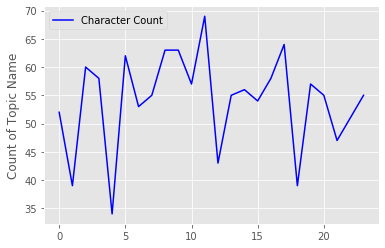

In [164]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(df['char_count'] , 'b-', label='Character Count')
plt.legend(loc='upper left')
plt.ylabel('Count of Topic Name')

# charcter count min: less than 35 characters, max: more than 65 characters for TOPIC NAME

Text(0, 0.5, 'Count of Topic Name')

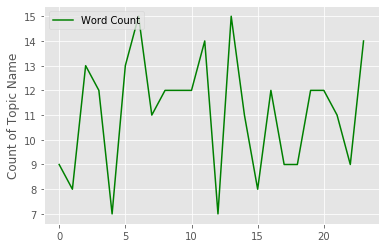

In [166]:
plt.plot(df['word_count'], 'g-', label='Word Count')
plt.legend(loc='upper left')
plt.ylabel('Count of Topic Name')
# word count min: 7 words, max: 15 words for TOPIC NAME

In [167]:
df['word_count'] = df['Summary'].apply(lambda x : len(x.split()))
df['char_count'] = df['Summary'].apply(lambda x : len(x.replace(" ","")))
df['word_density'] = df['word_count'] / (df['char_count'] + 1)

print(df[['word_count', 'char_count', 'word_density']].head(24))

    word_count  char_count  word_density
0           48         261      0.183206
1           59         277      0.212230
2           54         276      0.194946
3           31         153      0.201299
4          109         609      0.178689
5           28         132      0.210526
6           45         242      0.185185
7           53         281      0.187943
8           33         189      0.173684
9           56         307      0.181818
10          42         237      0.176471
11          95         519      0.182692
12          49         251      0.194444
13          42         212      0.197183
14          45         220      0.203620
15          25         143      0.173611
16          93         499      0.186000
17          59         292      0.201365
18          28         156      0.178344
19          20         136      0.145985
20          24         125      0.190476
21          62         337      0.183432
22          89         463      0.191810
23          52  

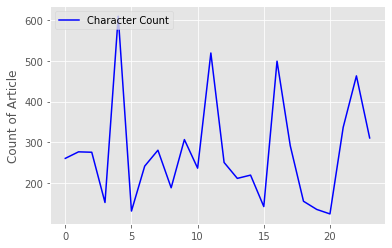

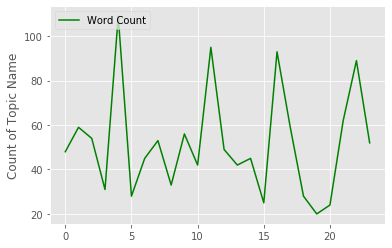

In [157]:
plt.plot(df['char_count'] , 'b-', label='Character Count')
plt.legend(loc='upper left')
plt.ylabel('Count of Article')
plt.show()
# Character count : min- less than 200 character and max - 600 characters for ARTICLE TEXT
plt.plot(df['word_count'] , 'g-', label='Word Count')
plt.legend(loc='upper left')
plt.ylabel('Count of Article')
plt.show()
# Word count : min- 20 words and max - more than 100 words for ARTICLE TEXT

In [23]:
df['time'] = df['Date of Posting'].apply(lambda x : str(x)[:7])
df['month_date_year'] = df['Date of Posting'].apply(lambda x : str(x)[8:])
df[['time', 'month_date_year']].tail(23)

time  month_date_year
1   6:20pm,   August 8, 2019
2   2:00pm,   August 8, 2019
3   6:00am,   August 7, 2019
4   8:00am,   August 8, 2019
5   6:00am,   August 6, 2019
6   6:00am,   August 8, 2019
7   2:00pm,   August 7, 2019
8   1:00pm,   August 7, 2019
9   3:37pm,   August 6, 2019
10  10:00am   August 6, 2019
11  6:00am,   August 6, 2019
12  11:00am   August 5, 2019
13  8:00am,   August 5, 2019
14  6:00am,   August 5, 2019
15  8:00am,   August 4, 2019
16  3:52pm,   August 2, 2019
17  3:09pm,   August 2, 2019
18  6:00am,   August 2, 2019
19  10:45am   August 2, 2019
20  1:00pm,    July 31, 2019
21  2:00pm,   August 1, 2019
22  12:07pm   August 1, 2019
23  2:03pm,    July 31, 2019

In [24]:
# program to generate WordCloud- Visualization 
from word_cloud.word_cloud_generator import WordCloud
from IPython.core.display import HTML
from nltk.corpus import reuters
import nltk
import pandas as pd

In [25]:
ENGLISH_STOP_WORDS = frozenset([
    "a", "about", "above", "across", "after", "afterwards", "again", "against",
    "all", "almost", "alone", "along", "already", "also", "although", "always",
    "am", "among", "amongst", "amoungst", "amount", "an", "and", "another",
    "any", "anyhow", "anyone", "anything", "anyway", "anywhere", "are",
    "around", "as", "at", "back", "be", "became", "because", "become",
    "becomes", "becoming", "been", "before", "beforehand", "behind", "being",
    "below", "beside", "besides", "between", "beyond", "bill", "both",
    "bottom", "but", "by", "call", "can", "cannot", "cant", "co", "con",
    "could", "couldnt", "cry", "de", "describe", "detail", "do", "done",
    "down", "due", "during", "each", "eg", "eight", "either", "eleven", "else",
    "elsewhere", "empty", "enough", "etc", "even", "ever", "every", "everyone",
    "everything", "everywhere", "except", "few", "fifteen", "fifty", "fill",
    "find", "fire", "first", "five", "for", "former", "formerly", "forty",
    "found", "four", "from", "front", "full", "further", "get", "give", "go",
    "had", "has", "hasnt", "have", "he", "hence", "her", "here", "hereafter",
    "hereby", "herein", "hereupon", "hers", "herself", "him", "himself", "his",
    "how", "however", "hundred", "i", "ie", "if", "in", "inc", "indeed",
    "interest", "into", "is", "it", "its", "itself", "keep", "last", "latter",
    "latterly", "least", "less", "ltd", "made", "many", "may", "me",
    "meanwhile", "might", "mill", "mine", "more", "moreover", "most", "mostly",
    "move", "much", "must", "my", "myself", "name", "namely", "neither",
    "never", "nevertheless", "next", "nine", "no", "nobody", "none", "noone",
    "nor", "not", "nothing", "now", "nowhere", "of", "off", "often", "on",
    "once", "one", "only", "onto", "or", "other", "others", "otherwise", "our",
    "ours", "ourselves", "out", "over", "own", "part", "per", "perhaps",
    "please", "put", "rather", "re", "same", "see", "seem", "seemed",
    "seeming", "seems", "serious", "several", "she", "should", "show", "side",
    "since", "sincere", "six", "sixty", "so", "some", "somehow", "someone",
    "something", "sometime", "sometimes", "somewhere", "still", "such",
    "system", "take", "ten", "than", "that", "the", "their", "them",
    "themselves", "then", "thence", "there", "thereafter", "thereby",
    "therefore", "therein", "thereupon", "these", "they", "thick", "thin",
    "third", "this", "those", "though", "three", "through", "throughout",
    "thru", "thus", "to", "together", "too", "top", "toward", "towards",
    "twelve", "twenty", "two", "un", "under", "until", "up", "upon", "us",
    "very", "via", "was", "we", "well", "were", "what", "whatever", "when",
    "whence", "whenever", "where", "whereafter", "whereas", "whereby",
    "wherein", "whereupon", "wherever", "whether", "which", "while", "whither",
    "who", "whoever", "whole", "whom", "whose", "why", "will", "with",
    "within", "without", "would", "yet", "said","you", "your", "yours", "yourself",
    "yourselves"])

wc=WordCloud(use_tfidf=False,stopwords=ENGLISH_STOP_WORDS)
import pandas as pd 

df = pd.read_csv(r"sciencenews_all_data.csv", encoding ="latin-1") 
#don't randomize color, show only top 50
embed_code=wc.get_embed_code(text=df['Summary'],random_color=False,topn=100)
HTML(embed_code)

# highlights words used commanly in the articles like "says","boston","cells", "stars", etc.

In [26]:
embed_code=wc.get_embed_code(text=df['Topic Name'],random_color=True,topn=40)
HTML(embed_code)
# common words used in Title articles : "live", "new", "early","study",etc.

In [27]:
from gensim import matutils, models
import scipy.sparse
top_dict = {}
for c in df.columns:
    top = df[c].sort_values(ascending=False).head(30)
    top_dict[c]= list(zip(top.index, top.values))

top_dict

{'Topic Name': [(5,
   'With nowhere to hide from rising seas, Boston prepares for a wetter future'),
  (7, 'Why people with celiac disease suffer so soon after eating gluten'),
  (22, 'Thereâ\x80\x99s more to pufferfish than that goofy spiked balloon'),
  (2,
   'The worst wildfires can send smoke high enough to affect the ozone layer'),
  (16,
   'The Arctic is burning and Greenland is melting, thanks to record heat'),
  (18, 'Stars may keep spinning fast, long into old age'),
  (15, 'Satellites are transforming how archaeologists study the past'),
  (9,
   'Racist words and acts, like the El Paso shooting, harm childrenâ\x80\x99s health'),
  (19,
   'Public trust that scientists work for the good of society is growing '),
  (6, 'One in 4 people live in places at high risk of running out of water'),
  (23, 'Monkeys can use basic logic to decipher the order of items in a list'),
  (1, 'How these tiny insect larvae leap without legs'),
  (11,
   'How the 5 riskiest U.S. cities for coas

In [178]:
data =df
from textblob import TextBlob # sentiment function of textblob returns two properties, polarity, and subjectivity
import sys
pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity

data['polarity'] = data['Summary'].apply(pol)
data['subjectivity'] = data['Summary'].apply(sub)
print(data)

                                           Topic Name  \
0   Exploding stars scattered traces of iron over ...   
1      How these tiny insect larvae leap without legs   
2   The worst wildfires can send smoke high enough...   
3   How pieces of live human brain are helping sci...   
4            50 years ago, Fermilab turned to bubbles   
5   With nowhere to hide from rising seas, Boston ...   
6   One in 4 people live in places at high risk of...   
7   Why people with celiac disease suffer so soon ...   
8   Giant, active galaxies from the early universe...   
9   Racist words and acts, like the El Paso shooti...   
10  A fungus makes a chemical that neutralizes the...   
11  How the 5 riskiest U.S. cities for coastal flo...   
12  Ancient Maya warfare flared up surprisingly early   
13  A new map is the best view yet of how fast Ant...   
14  Decades of dumping acid suggest acid rain may ...   
15  Satellites are transforming how archaeologists...   
16  The Arctic is burning and G

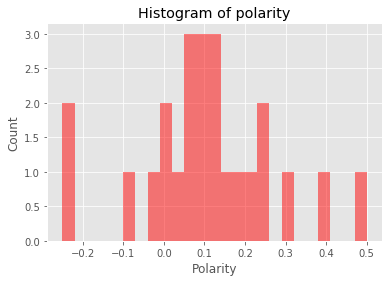

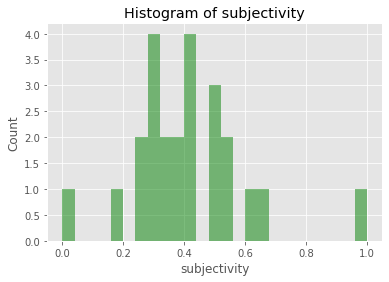

In [187]:
num_bins = 25
n, bins, patches = plt.hist(data['polarity'], num_bins, facecolor='red', alpha=0.5)
plt.xlabel('Polarity')
plt.ylabel('Count')
plt.title('Histogram of polarity')
plt.show()

n, bins, patches = plt.hist(data['subjectivity'], num_bins, facecolor='green', alpha=0.5)
plt.xlabel('subjectivity')
plt.ylabel('Count')
plt.title('Histogram of subjectivity')
plt.show()

# Polarity is float which lies in the range of [-1,1] where 1 means positive statement and -1 means a negative statement.
# by looking at graph and data . the one with high polarity is a POSITIVE ARTICLE.

# Subjectivity refers to judgement / personal opinion: 
# if it is 0.8, then the statement is positive and 0.75 subjectivity is a public opinion and not a factual information.

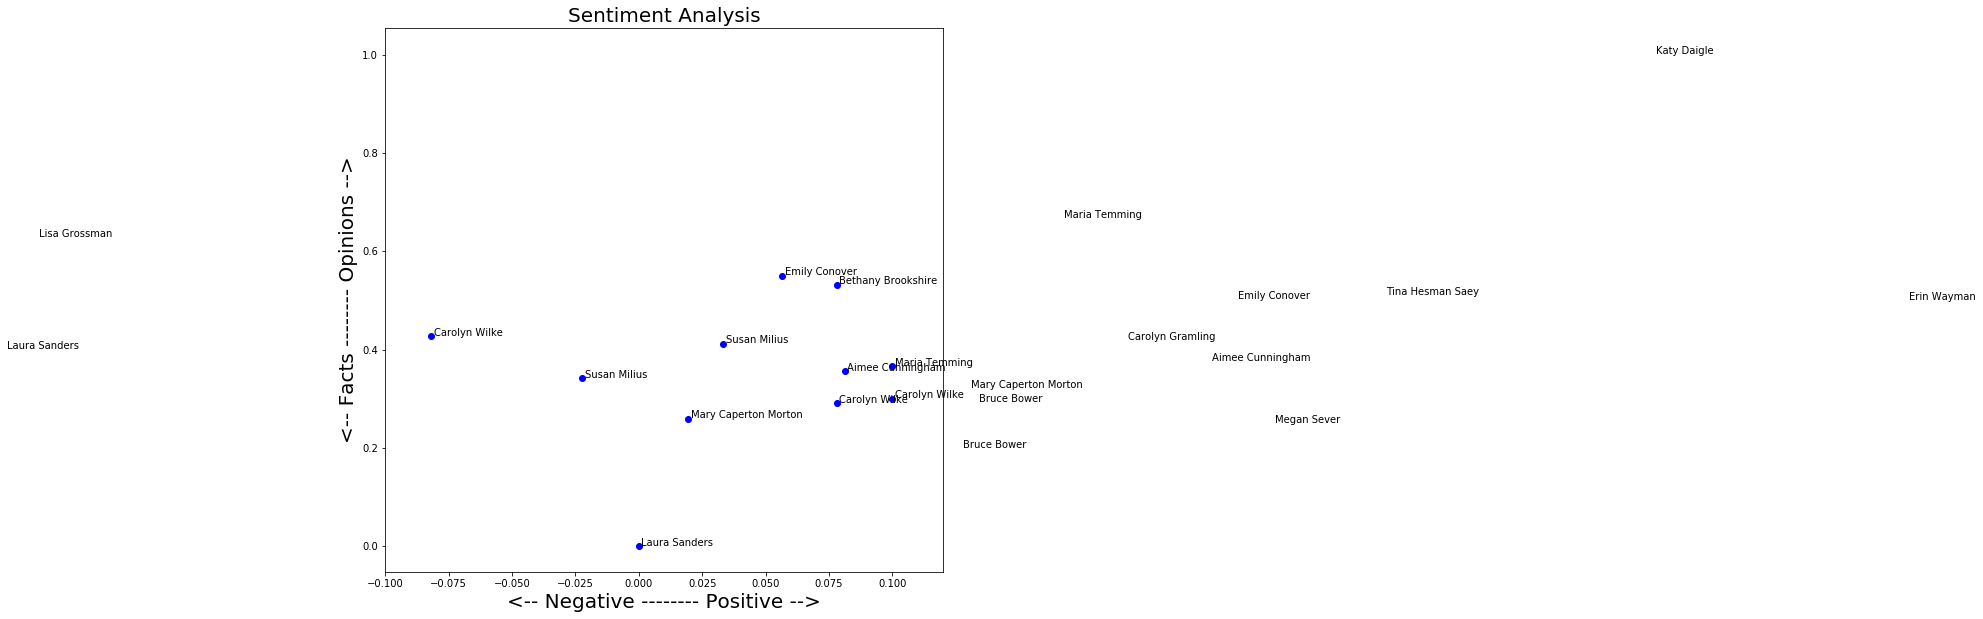

In [29]:
#..................................SENTIMENT NALAYSIS...............................#
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [10, 10]

for index, comedian in enumerate(data.index):
    x = data.polarity.loc[comedian]
    y = data.subjectivity.loc[comedian]
    plt.scatter(x, y, color='blue')
    plt.text(x+.001, y+.001, data['Author name'][index], fontsize=10)
    plt.xlim(-.10, .12) 
    
plt.title('Sentiment Analysis', fontsize=20)
plt.xlabel('<-- Negative -------- Positive -->', fontsize=20)
plt.ylabel('<-- Facts -------- Opinions -->', fontsize=20)
# representing positive and negative facts and analysis in graph based on POlarity and Subjectivity
plt.show()

In [30]:
#.........................................NAMED ENTITY RECOGNITION (NER) ...............................................#
#NER using nltk and spact library is done to udentity certain things like to identify the names of things, 
#..............such as persons, organizations, or locations from the csv extraxted.
import nltk
nltk.download('averaged_perceptron_tagger')
from nltk.tokenize import word_tokenize
from nltk.tag import pos_tag

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\AKSHIT\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [31]:
ex = df['Summary'] # taking articles data only from the entire csv for NER
new = str(ex) 
def preprocess(sent):
    sent = nltk.word_tokenize(sent)
    sent = nltk.pos_tag(sent)
    return sent
sent = preprocess(new)
sent
#word tokenization
#part of speech tagging 


[('0', 'CD'),
 ('â\x80\x9cThis', 'NN'),
 ('is', 'VBZ'),
 ('actually', 'RB'),
 ('quite', 'RB'),
 ('a', 'DT'),
 ('profound', 'JJ'),
 ('thing', 'NN'),
 (',', ','),
 ('â\x80\x9d', 'VBP'),
 ('...', ':'),
 ('1', 'CD'),
 ('Poppinga', 'NNP'),
 ('and', 'CC'),
 ('colleagues', 'NNS'),
 ('recently', 'RB'),
 ('showed', 'VBD'),
 ('that', 'IN'),
 ('C', 'NNP'),
 ('...', ':'),
 ('2', 'CD'),
 ('Given', 'NNP'),
 ('that', 'WDT'),
 ('climate', 'VBP'),
 ('change', 'NN'),
 ('is', 'VBZ'),
 ('increasing', 'VBG'),
 ('fire', 'NN'),
 ('f', 'NN'),
 ('...', ':'),
 ('3', 'CD'),
 ('This', 'DT'),
 ('article', 'NN'),
 ('appears', 'VBZ'),
 ('in', 'IN'),
 ('the', 'DT'),
 ('August', 'NNP'),
 ('17', 'CD'),
 (',', ','),
 ('2019', 'CD'),
 ('is', 'VBZ'),
 ('...', ':'),
 ('4', 'CD'),
 ('NAL', 'NNP'),
 ('was', 'VBD'),
 ('renamed', 'VBN'),
 ('Fermilab', 'NNP'),
 ('in', 'IN'),
 ('1974', 'CD'),
 ('for', 'IN'),
 ('physicist', 'NN'),
 ('...', ':'),
 ('5', 'CD'),
 ('This', 'DT'),
 ('article', 'NN'),
 ('appears', 'VBZ'),
 ('in', 'IN')

In [32]:
# OUTPUT: a list of tuples containing the individual words and their associated part-of-speech.
# that indicate how sentences should be chunked.
# noun phrase: NP
# an optional determiner: DT
# adjectives: JJ
# a noun: N ,etc different codes have different meaning
pattern = 'NP: {<DT>?<JJ>*<NN>}'
cp = nltk.RegexpParser(pattern)
cs = cp.parse(sent)
print(cs)
# chunking

(S
  0/CD
  (NP âThis/NN)
  is/VBZ
  actually/RB
  quite/RB
  (NP a/DT profound/JJ thing/NN)
  ,/,
  â/VBP
  .../:
  1/CD
  Poppinga/NNP
  and/CC
  colleagues/NNS
  recently/RB
  showed/VBD
  that/IN
  C/NNP
  .../:
  2/CD
  Given/NNP
  that/WDT
  climate/VBP
  (NP change/NN)
  is/VBZ
  increasing/VBG
  (NP fire/NN)
  (NP f/NN)
  .../:
  3/CD
  (NP This/DT article/NN)
  appears/VBZ
  in/IN
  the/DT
  August/NNP
  17/CD
  ,/,
  2019/CD
  is/VBZ
  .../:
  4/CD
  NAL/NNP
  was/VBD
  renamed/VBN
  Fermilab/NNP
  in/IN
  1974/CD
  for/IN
  (NP physicist/NN)
  .../:
  5/CD
  (NP This/DT article/NN)
  appears/VBZ
  in/IN
  the/DT
  August/NNP
  17/CD
  ,/,
  2019/CD
  is/VBZ
  .../:
  6/CD
  The/DT
  United/NNP
  States/NNPS
  is/VBZ
  considered/VBN
  to/TO
  have/VB
  relati/NNS
  .../:
  7/CD
  Knowing/VBG
  that/DT
  certain/JJ
  T/NNP
  cells/NNS
  ,/,
  and/CC
  cytokines/NNS
  in/IN
  .../:
  8/CD
  Wang/NNP
  and/CC
  colleagues/NNS
  now/RB
  plan/VBP
  to/TO
  take/VB
  a/DT
  l

In [33]:
from nltk.chunk import conlltags2tree, tree2conlltags
from pprint import pprint
iob_tagged = tree2conlltags(cs)
pprint(iob_tagged) # IOB TAGS FOR CHUNKS

[('0', 'CD', 'O'),
 ('â\x80\x9cThis', 'NN', 'B-NP'),
 ('is', 'VBZ', 'O'),
 ('actually', 'RB', 'O'),
 ('quite', 'RB', 'O'),
 ('a', 'DT', 'B-NP'),
 ('profound', 'JJ', 'I-NP'),
 ('thing', 'NN', 'I-NP'),
 (',', ',', 'O'),
 ('â\x80\x9d', 'VBP', 'O'),
 ('...', ':', 'O'),
 ('1', 'CD', 'O'),
 ('Poppinga', 'NNP', 'O'),
 ('and', 'CC', 'O'),
 ('colleagues', 'NNS', 'O'),
 ('recently', 'RB', 'O'),
 ('showed', 'VBD', 'O'),
 ('that', 'IN', 'O'),
 ('C', 'NNP', 'O'),
 ('...', ':', 'O'),
 ('2', 'CD', 'O'),
 ('Given', 'NNP', 'O'),
 ('that', 'WDT', 'O'),
 ('climate', 'VBP', 'O'),
 ('change', 'NN', 'B-NP'),
 ('is', 'VBZ', 'O'),
 ('increasing', 'VBG', 'O'),
 ('fire', 'NN', 'B-NP'),
 ('f', 'NN', 'B-NP'),
 ('...', ':', 'O'),
 ('3', 'CD', 'O'),
 ('This', 'DT', 'B-NP'),
 ('article', 'NN', 'I-NP'),
 ('appears', 'VBZ', 'O'),
 ('in', 'IN', 'O'),
 ('the', 'DT', 'O'),
 ('August', 'NNP', 'O'),
 ('17', 'CD', 'O'),
 (',', ',', 'O'),
 ('2019', 'CD', 'O'),
 ('is', 'VBZ', 'O'),
 ('...', ':', 'O'),
 ('4', 'CD', 'O'),
 ('NA

In [34]:
from nltk import ne_chunk
nltk.download('maxent_ne_chunker')
nltk.download('words')
ne_tree = ne_chunk(pos_tag(word_tokenize(new))) # CATEGORY LABELS
print(ne_tree)

[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\AKSHIT\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\AKSHIT\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


(S
  0/CD
  âThis/NN
  is/VBZ
  actually/RB
  quite/RB
  a/DT
  profound/JJ
  thing/NN
  ,/,
  â/VBP
  .../:
  1/CD
  Poppinga/NNP
  and/CC
  colleagues/NNS
  recently/RB
  showed/VBD
  that/IN
  C/NNP
  .../:
  2/CD
  Given/NNP
  that/WDT
  climate/VBP
  change/NN
  is/VBZ
  increasing/VBG
  fire/NN
  f/NN
  .../:
  3/CD
  This/DT
  article/NN
  appears/VBZ
  in/IN
  the/DT
  August/NNP
  17/CD
  ,/,
  2019/CD
  is/VBZ
  .../:
  4/CD
  (ORGANIZATION NAL/NNP)
  was/VBD
  renamed/VBN
  (PERSON Fermilab/NNP)
  in/IN
  1974/CD
  for/IN
  physicist/NN
  .../:
  5/CD
  This/DT
  article/NN
  appears/VBZ
  in/IN
  the/DT
  August/NNP
  17/CD
  ,/,
  2019/CD
  is/VBZ
  .../:
  6/CD
  The/DT
  (GPE United/NNP States/NNPS)
  is/VBZ
  considered/VBN
  to/TO
  have/VB
  relati/NNS
  .../:
  7/CD
  Knowing/VBG
  that/DT
  certain/JJ
  T/NNP
  cells/NNS
  ,/,
  and/CC
  cytokines/NNS
  in/IN
  .../:
  8/CD
  (PERSON Wang/NNP)
  and/CC
  colleagues/NNS
  now/RB
  plan/VBP
  to/TO
  take/VB
  a/D

In [35]:
# NER BY SPACY
import spacy
from spacy import displacy
from collections import Counter
import en_core_web_sm
nlp = en_core_web_sm.load()

In [46]:
doc = nlp(new)
pprint([(X, X) for X in doc.ents])

[(0, 0),
 (1, 1),
 (Poppinga, Poppinga),
 (2, 2),
 (3, 3),
 (the August 17, 2019, the August 17, 2019),
 (4, 4),
 (NAL, NAL),
 (Fermilab, Fermilab),
 (1974, 1974),
 (5, 5),
 (the August 17, 2019, the August 17, 2019),
 (6, 6),
 (The United States, The United States),
 (7, 7),
 (Knowing, Knowing),
 (8, 8),
 (Wang, Wang),
 (9, 9),
 (10, 10),
 (11, 11),
 (12, 12),
 (800, 800),
 (Maya, Maya),
 (13, 13),
 (2021, 2021),
 (NASA, NASA),
 (the Indian Space Research Or, the Indian Space Research Or),
 (14, 14),
 (Soils, Soils),
 (15, 15),
 (Amazon.com, Amazon.com),
 (16, 16),
 (17, 17),
 (Wisconsin, Wisconsin),
 (18, 18),
 (19, 19),
 (20, 20),
 (21, 21),
 (The Milky, The Milky),
 (22, 22),
 (23, 23)]


In [47]:
pprint([(X, X.ent_iob_, X.ent_type_) for X in doc]) 
#BILUO TAGGING "B" :the token begins an entity, 
#"I": it is inside an entity, "O" :it is outside an entity, and "" : no entity tag is set.

[(0, 'B', 'CARDINAL'),
 (    , 'O', ''),
 (âThis, 'O', ''),
 (is, 'O', ''),
 (actually, 'O', ''),
 (quite, 'O', ''),
 (a, 'O', ''),
 (profound, 'O', ''),
 (thing, 'O', ''),
 (,, 'O', ''),
 (â, 'O', ''),
 (..., 'O', ''),
 (
, 'O', ''),
 (1, 'B', 'CARDINAL'),
 (    , 'O', ''),
 (Poppinga, 'B', 'ORG'),
 (and, 'O', ''),
 (colleagues, 'O', ''),
 (recently, 'O', ''),
 (showed, 'O', ''),
 (that, 'O', ''),
 (C, 'O', ''),
 (..., 'O', ''),
 (
, 'O', ''),
 (2, 'B', 'CARDINAL'),
 (    , 'O', ''),
 (Given, 'O', ''),
 (that, 'O', ''),
 (climate, 'O', ''),
 (change, 'O', ''),
 (is, 'O', ''),
 (increasing, 'O', ''),
 (fire, 'O', ''),
 (f, 'O', ''),
 (..., 'O', ''),
 (
, 'O', ''),
 (3, 'B', 'CARDINAL'),
 (    , 'O', ''),
 (This, 'O', ''),
 (article, 'O', ''),
 (appears, 'O', ''),
 (in, 'O', ''),
 (the, 'B', 'EVENT'),
 (August, 'I', 'EVENT'),
 (17, 'I', 'EVENT'),
 (,, 'I', 'EVENT'),
 (2019, 'I', 'EVENT'),
 (is, 'O', ''),
 (..., 'O', ''),
 (
, 'O', ''),
 (4, 'B', 'CARDINAL'),
 (    , 'O', ''),
 (NAL,

In [59]:
labels = [x for x in doc]
Counter(labels) # EXTRACTING UNIQUE ENTITY LABELS FROM THE DATASET

Counter({0: 1,
             : 1,
         âThis: 1,
         is: 1,
         actually: 1,
         quite: 1,
         a: 1,
         profound: 1,
         thing: 1,
         ,: 1,
         â: 1,
         ...: 1,
         : 1,
         1: 1,
             : 1,
         Poppinga: 1,
         and: 1,
         colleagues: 1,
         recently: 1,
         showed: 1,
         that: 1,
         C: 1,
         ...: 1,
         : 1,
         2: 1,
             : 1,
         Given: 1,
         that: 1,
         climate: 1,
         change: 1,
         is: 1,
         increasing: 1,
         fire: 1,
         f: 1,
         ...: 1,
         : 1,
         3: 1,
             : 1,
         This: 1,
         article: 1,
         appears: 1,
         in: 1,
         the: 1,
         August: 1,
         17: 1,
         ,: 1,
         2019: 1,
         is: 1,
         ...: 1,
         : 1,
         4: 1,
             : 1,
         NAL: 1,
         was: 1,
         renamed: 1,
         Fermilab: 1,
 

In [119]:
items = [x for x in doc]
Counter(items).most_common(20) # 20 most frequent tokens in article data

[(0, 1),
 (    , 1),
 (âThis, 1),
 (is, 1),
 (actually, 1),
 (quite, 1),
 (a, 1),
 (profound, 1),
 (thing, 1),
 (,, 1),
 (â, 1),
 (..., 1),
 (, 1),
 (1, 1),
 (    , 1),
 (Poppinga, 1),
 (and, 1),
 (colleagues, 1),
 (recently, 1),
 (showed, 1)]

In [116]:
displacy.render(nlp(str(new)), jupyter=True, style='ent') # generates raw markup  for "named entity visualization"

In [121]:
displacy.render(nlp(str(new)), style='dep', jupyter = True, options = {'distance': 100}) 
# another type of display.render style: dep/ent

In [83]:
[(x.orth_,x.pos_, x.lemma_) for x in [y 
                                      for y
                                      in nlp(str(doc)) 
                                      if not y.is_stop and y.pos_ != 'PUNCT']] 
# extracting the part-of-speech and then lemmatizing this sentences

[('    ', 'SPACE', '    '),
 ('â\x80\x9cThis', 'PROPN', 'â\x80\x9cThis'),
 ('actually', 'ADV', 'actually'),
 ('profound', 'ADJ', 'profound'),
 ('thing', 'NOUN', 'thing'),
 ('â\x80\x9d', 'NOUN', 'â\x80\x9d'),
 ('\n', 'SPACE', '\n'),
 ('1', 'NUM', '1'),
 ('    ', 'SPACE', '    '),
 ('Poppinga', 'PROPN', 'Poppinga'),
 ('colleagues', 'NOUN', 'colleague'),
 ('recently', 'ADV', 'recently'),
 ('showed', 'VERB', 'show'),
 ('C', 'NOUN', 'c'),
 ('\n', 'SPACE', '\n'),
 ('2', 'NUM', '2'),
 ('    ', 'SPACE', '    '),
 ('Given', 'VERB', 'give'),
 ('climate', 'NOUN', 'climate'),
 ('change', 'NOUN', 'change'),
 ('increasing', 'VERB', 'increase'),
 ('fire', 'NOUN', 'fire'),
 ('f', 'X', 'f'),
 ('\n', 'SPACE', '\n'),
 ('3', 'NUM', '3'),
 ('    ', 'SPACE', '    '),
 ('article', 'NOUN', 'article'),
 ('appears', 'VERB', 'appear'),
 ('August', 'PROPN', 'August'),
 ('17', 'NUM', '17'),
 ('2019', 'NUM', '2019'),
 ('\n', 'SPACE', '\n'),
 ('4', 'NUM', '4'),
 ('    ', 'SPACE', '    '),
 ('NAL', 'PROPN', 'NAL'),
 

In [126]:
dict([(x, x.label_) for x in nlp(str(new)).ents]) # list of all named entity extracted

{0: 'CARDINAL',
 1: 'CARDINAL',
 Poppinga: 'ORG',
 2: 'CARDINAL',
 3: 'CARDINAL',
 the August 17, 2019: 'EVENT',
 4: 'CARDINAL',
 NAL: 'ORG',
 Fermilab: 'PERSON',
 1974: 'DATE',
 5: 'CARDINAL',
 the August 17, 2019: 'EVENT',
 6: 'CARDINAL',
 The United States: 'GPE',
 7: 'CARDINAL',
 Knowing: 'GPE',
 8: 'CARDINAL',
 Wang: 'ORG',
 9: 'CARDINAL',
 10: 'CARDINAL',
 11: 'CARDINAL',
 12: 'CARDINAL',
 800: 'CARDINAL',
 Maya: 'NORP',
 13: 'CARDINAL',
 2021: 'CARDINAL',
 NASA: 'ORG',
 the Indian Space Research Or: 'ORG',
 14: 'CARDINAL',
 Soils: 'PERSON',
 15: 'CARDINAL',
 Amazon.com: 'PRODUCT',
 16: 'CARDINAL',
 17: 'CARDINAL',
 Wisconsin: 'GPE',
 18: 'CARDINAL',
 19: 'CARDINAL',
 20: 'CARDINAL',
 21: 'CARDINAL',
 The Milky: 'ORG',
 22: 'CARDINAL',
 23: 'CARDINAL'}

In [21]:
#.............................................TOPIC MODELLING.........................................#####
import pandas as pd
df = pd.read_csv('sciencenews_all_data.csv')
data_text = df
data_text['index'] = data_text.index
documents = data_text
print(len(documents))
print(documents[:5])

24
                                          Topic Name  \
0  Exploding stars scattered traces of iron over ...   
1     How these tiny insect larvae leap without legs   
2  The worst wildfires can send smoke high enough...   
3  How pieces of live human brain are helping sci...   
4           50 years ago, Fermilab turned to bubbles   

                                                Link         Author name  \
0  https://www.sciencenews.org//article/exploding...       Emily Conover   
1  https://www.sciencenews.org//article/how-these...        Susan Milius   
2  https://www.sciencenews.org//article/worst-wil...         Megan Sever   
3  https://www.sciencenews.org//article/experimen...       Laura Sanders   
4  https://www.sciencenews.org//article/50-years-...  Bethany Brookshire   

          Date of Posting                                            Summary  \
0  6:00am, August 9, 2019  “This is actually quite a profound thing,” say...   
1  6:20pm, August 8, 2019  Poppinga and col

In [22]:
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
import numpy as np
np.random.seed(2018)
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\AKSHIT\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [23]:
from nltk import PorterStemmer

# lemmatize and stem preprocessing 

PorterStemmer().stem('complications')
stemmer = PorterStemmer()
def lemmatize_stemming(text):
    return stemmer.stem(WordNetLemmatizer().lemmatize(text, pos='v'))
def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3:
            result.append(lemmatize_stemming(token))
    return result


In [24]:
doc_sample = documents[documents['index'] == 12].values[0][0]
print('original sentence: ')
words = []
for word in doc_sample.split(' '):
    words.append(word)
print(words)
print('\n\n tokenized and lemmatized sentence: ')
print(preprocess(doc_sample))

# can run for different sentences within data range

original sentence: 
['Ancient', 'Maya', 'warfare', 'flared', 'up', 'surprisingly', 'early']


 tokenized and lemmatized sentence: 
['ancient', 'maya', 'warfar', 'flare', 'surprisingli', 'earli']


In [25]:
processed_docs = documents['Summary'].map(preprocess)
processed_docs[:20]


0     [actual, profound, thing, say, astrophysicist,...
1     [poppinga, colleagu, recent, show, chines, wit...
2     [give, climat, chang, increas, frequenc, inten...
3     [articl, appear, august, issu, scienc, news, h...
4     [renam, fermilab, physicist, enrico, fermi, ac...
5     [articl, appear, august, issu, scienc, news, h...
6     [unit, state, consid, rel, risk, overal, use, ...
7     [know, certain, cell, cytokin, particular, cau...
8     [wang, colleagu, plan, larger, censu, ancient,...
9     [trent, pediatrician, help, famili, discuss, d...
10    [add, common, cosmet, ingredi, speed, pericosi...
11    [neighborhood, level, project, futur, level, r...
12    [prior, maya, peopl, consid, dishonor, kill, w...
13    [nasa, indian, space, research, organ, plan, l...
14    [soil, typic, slow, recov, calcium, lose, stud...
15    [archaeolog, space, amazon, scienc, news, part...
16    [increasingli, frequent, winter, warm, spell, ...
17    [investig, wisconsin, teen, provid, answer

In [26]:
# BAG OF WORDS
dictionary = gensim.corpora.Dictionary(processed_docs)
count = 0
for k, v in dictionary.iteritems():
    print(k, v)
    count += 1
    if count > 20:
        break
        
# OUTPUT: containing the number of times a word appears; I executed for 20 times

0 actual
1 astrophysicist
2 brian
3 champaign
4 death
5 field
6 galaxi
7 histori
8 illinoi
9 involv
10 live
11 massiv
12 neighborhood
13 profound
14 recent
15 research
16 say
17 star
18 tell
19 thing
20 univers


In [27]:
#.....................................................Topic Modelling...............using LSA-Latent Semantic Analysis 
import seaborn as sns

In [28]:
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer
#..........sklearn’s TfidfVectorizer to create a document-term matrix ................
vectorizer = TfidfVectorizer(stop_words='english', 
max_features= 1000, 
max_df = 0.5, 
smooth_idf=True)

X = vectorizer.fit_transform(df['Summary'])

X.shape 
# SVD represent data in vectors 
svd_model = TruncatedSVD(n_components=20, algorithm='randomized', n_iter=100, random_state=122)

svd_model.fit(X)

len(svd_model.components_)
# used sklearn’s TruncatedSVD to perform the task of matrix decomposition

20

In [29]:
terms = vectorizer.get_feature_names()
# Now printing each of the 20 topics.
for i, comp in enumerate(svd_model.components_):
    terms_comp = zip(terms, comp)
    sorted_terms = sorted(terms_comp, key= lambda x:x[1], reverse=True)[:7]
    print("Topic "+str(i)+": ")
    for t in sorted_terms:
        print(t[0])
        print(" ")

Topic 0: 
news
 
science
 
boston
 
2019
 
appears
 
article
 
august
 
Topic 1: 
says
 
stars
 
galaxy
 
research
 
ability
 
use
 
involved
 
Topic 2: 
18
 
sn
 
probably
 
ability
 
climate
 
like
 
large
 
Topic 3: 
water
 
states
 
percent
 
risk
 
new
 
typically
 
considered
 
Topic 4: 
stars
 
18
 
sn
 
families
 
galaxy
 
cepheids
 
warped
 
Topic 5: 
changes
 
plan
 
space
 
colleagues
 
2021
 
allowing
 
antarctica
 
Topic 6: 
amazon
 
teens
 
details
 
changes
 
space
 
archaeology
 
associates
 
Topic 7: 
spines
 
pufferfishes
 
puffers
 
colleagues
 
amazon
 
seed
 
water
 
Topic 8: 
bubble
 
chamber
 
study
 
particles
 
massive
 
fermilab
 
lab
 
Topic 9: 
amounts
 
aagaard
 
bacteria
 
biological
 
convinced
 
microbes
 
placenta
 
Topic 10: 
trust
 
spines
 
celiac
 
gluten
 
cells
 
scientists
 
boykoff
 
Topic 11: 
trust
 
aagaard
 
bacteria
 
biological
 
convinced
 
microbes
 
placenta
 
Topic 12: 
trust
 
boykoff
 
credibility
 
effectiveness
 
important
 
just
 

In [30]:
#.....................TOPIC MODELLING BY USING LDA- Latent Dirichlet Allocation ................#
from nltk.corpus import stopwords 
from nltk.stem.wordnet import WordNetLemmatizer
import string
stop = set(stopwords.words('english'))
exclude = set(string.punctuation) 
lemma = WordNetLemmatizer()
def clean(doc):
    stop_free = " ".join([i for i in doc.lower().split() if i not in stop])
    punc_free = ''.join(ch for ch in stop_free if ch not in exclude)
    normalized = " ".join(lemma.lemmatize(word) for word in punc_free.split())
    return normalized

doc_clean = [clean(doc).split() for doc in df]   

In [47]:
import gensim
from gensim import corpora

Lda = gensim.models.ldamodel.LdaModel

# Running and Trainign LDA model on the document term matrix.
ldamodel = Lda(doc_term_matrix, num_topics=3, id2word = dictionary, passes=50)

In [51]:
print(ldamodel.print_topics(num_topics=1, num_words=4))

[(0, '0.002*"rain" + 0.002*"lose" + 0.002*"slow" + 0.002*"point"')]


In [ ]:
# Each line is a topic with individual topic terms and weights. 
#Topic1 can be termed as "Rain Lose SLow Point" : like during rain commute becomes slow, getting lost in traffic,etc.
# eg : 0.168*health + 0.083*sugar + 0.072*bad can be termed as BAD HEALTH.
#based on ones view.